In [2]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

Categories=['Cars','Ice cream cone','Cricket ball']
flat_data_arr=[] #input array
target_arr=[] #output array

datadir='C:\\Users\\NavyaSanju\\Downloads\\dataset-20240420T190510Z-001\\dataset' 
#path which contains all the categories of images

for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
    
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)

df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

model.fit(x_train,y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")



loading... category : Cars
loaded category:Cars successfully
loading... category : Ice cream cone
loaded category:Ice cream cone successfully
loading... category : Cricket ball
loaded category:Cricket ball successfully
Splitted Successfully
The Model is trained well with the given images
The predicted Data is :
[0 0 2 2 0 2 1 2 0 1 2 2 0 1 2 0 0 2 1 1]
The actual data is:
[0 0 2 2 0 1 1 2 0 1 2 2 0 1 2 0 0 0 1 1]
The model is 90.0% accurate


Enter URL of Image :https://in-confectionery.com/wp-content/uploads/2019/11/easiest-ever-fruit-ice-cream-ghk-1532637317.jpg


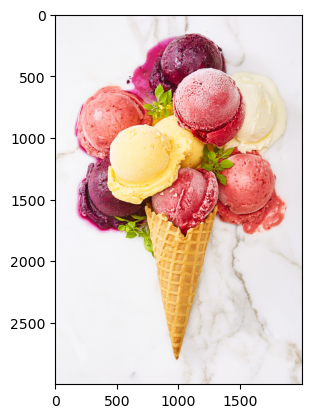

The predicted image is : Ice cream cone


In [3]:
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)

print("The predicted image is : "+Categories[model.predict(l)[0]])